   Unnamed: 0                            summary  day_number  weekday  \
1           1                   skolske kolo acm         289        4   
3           3                         rychlostne         272        1   
4           4  spisat si otazky na ksp chatu d u         273        2   
5           5                            ads d u         274        3   
6           6                 algebra inverznost         275        4   

   minutes_of_day  duration_minutes  calendar  category  
1             660             320.0  personal    school  
3             990             180.0  personal    school  
4             780              60.0  personal  trojsten  
5            1020              60.0  personal    school  
6             360              60.0  personal    school  
Features X of shape (4242, 4)
[[  2.89000000e+02   4.00000000e+00   6.60000000e+02   3.20000000e+02]
 [  2.72000000e+02   1.00000000e+00   9.90000000e+02   1.80000000e+02]
 [  2.73000000e+02   2.00000000e+00   7.8

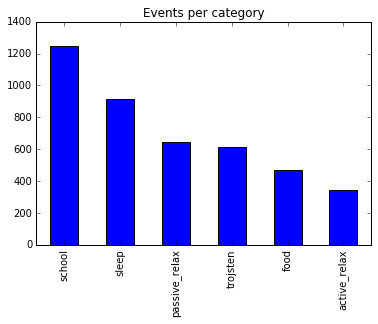

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

# matplotlib.rcParams.update({'font.size': 16})

data = pd.read_csv('data/categorized_events.csv').dropna()
# data = data.loc[data['category'] != 'school', :]
# data = data.loc[data['category'] != 'sleep', :]
# data = data.loc[:, data.columns != 'day_number']
# data['apx_month'] = np.floor((data['day_number'] % 365) / 31)
print(data.head())

X = data.iloc[:, [2, 3, 4, 5]].as_matrix()
print('Features X of shape', X.shape)
print(X)


y = data['category']
# category_to_int = {cat_name: i for i, cat_name in enumerate(set(y))}
category_to_int = {'sleep': 0, 'school': 1, 'passive_relax': 2, 'trojsten': 3, 'food': 4,  'active_relax': 5}
categories = [cat_name for cat_name, i in sorted(category_to_int.items(), key=lambda x: x[1])]
y = np.array([category_to_int[category] for category in y])
print('Labels y')
print(y)

print(utils.count_freqs(y))
data['category'].value_counts().plot(kind='bar')
plt.title('Events per category')
plt.show()


# Part 1: Data visualization

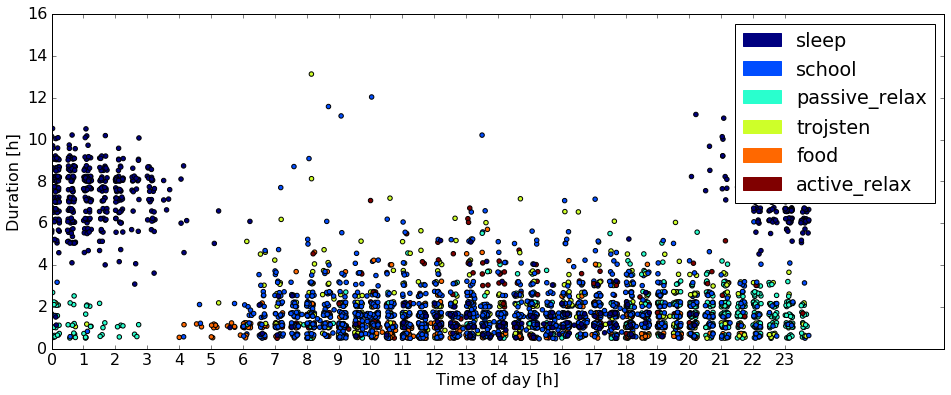

In [4]:
fig = plt.figure(figsize=(16, 6))
e = np.random.rand(len(y), 2) / 4 
plt.scatter(data['minutes_of_day'] / 60 + e[:, 0], data['duration_minutes'] / 60 + e[:, 1], c=y)
plt.xlim(0,28)
plt.ylim(0,16)
plt.xlabel('Time of day [h]')
plt.ylabel('Duration [h]')
plt.xticks(range(24))
utils.category_legend(category_to_int)
plt.show()

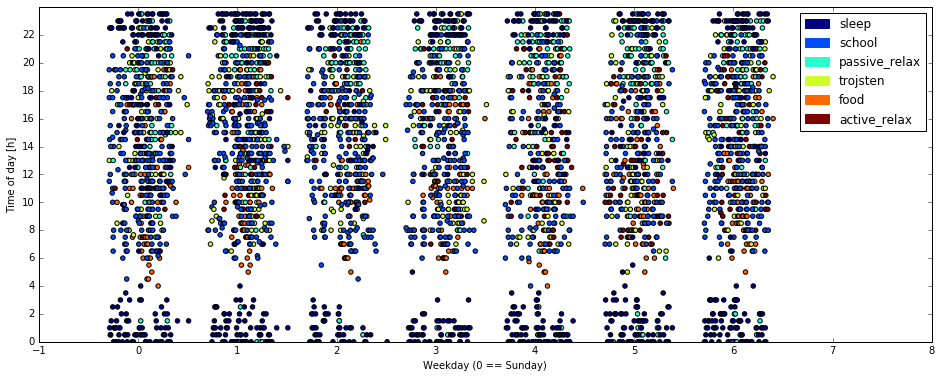

In [14]:
fig = plt.figure(figsize=(16, 6))
e = (data['day_number'] - min(data['day_number'])) / max(data['day_number'])
plt.scatter(data['weekday'] + e - 0.3 , data['minutes_of_day'] / 60, c=y)
plt.xlim(-1, 8)
plt.ylim(0,24)
plt.xlabel('Weekday (0 == Sunday)')
plt.ylabel('Time of day [h]')
plt.yticks(range(0, 24, 2))
utils.category_legend(category_to_int)
plt.show()

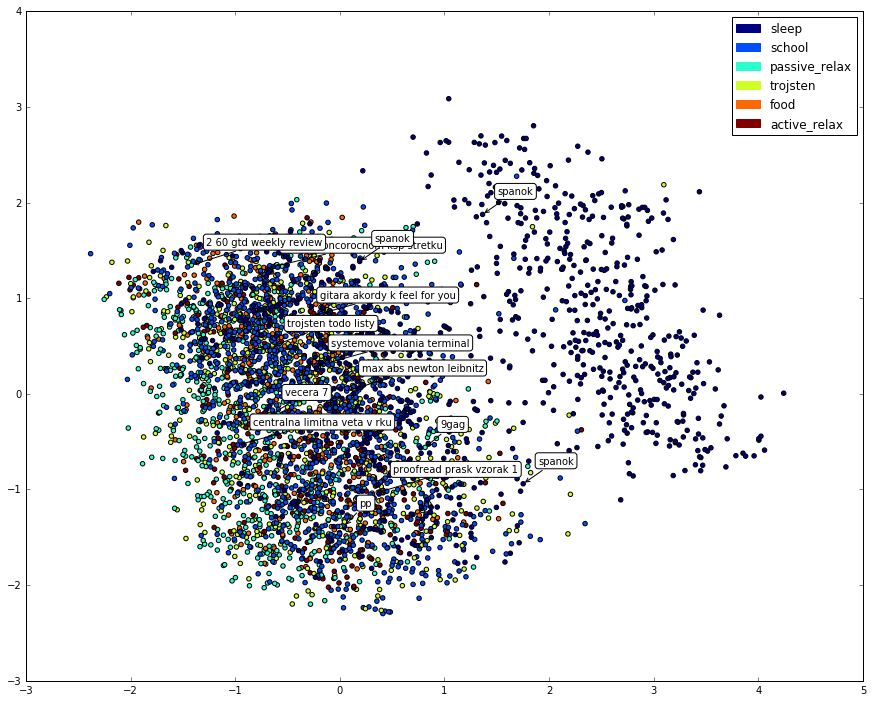

In [4]:
from sklearn.decomposition import PCA

nX = utils.normalize(X)

pca = PCA(n_components=2)
transformed = pca.fit_transform(nX)

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

plt.scatter(transformed[:, 0], transformed[:, 1], c=y)

labels = [label if np.random.rand() > 0.997 else '' for label in data['summary']]
utils.label_points(ax, transformed[:, 0], transformed[:, 1], labels)
utils.category_legend(category_to_int)

plt.show()

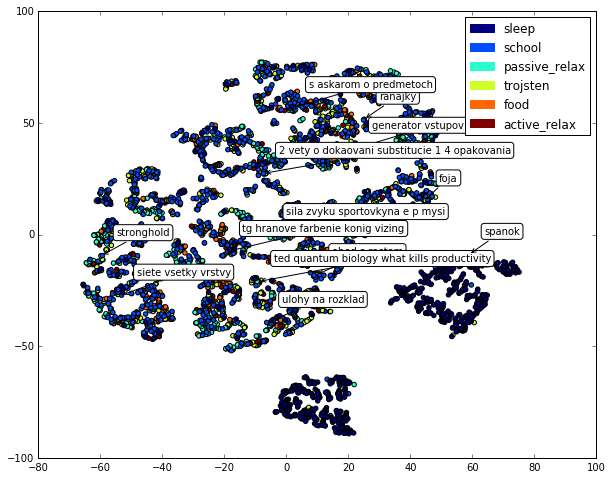

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
transformed_tsne = tsne.fit_transform(nX)

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)
plt.scatter(transformed_tsne[:, 0], transformed_tsne[:, 1], c=y)
utils.label_points(ax, transformed_tsne[:, 0], transformed_tsne[:, 1], labels)
utils.category_legend(category_to_int)
plt.show()

# Part 2: Simple classification

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=0)
splits = list(kf.split(X))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training accuracy: 0.606612542965 +/- 0.00361763115139
Testing accuracy: 0.580620652488 +/- 0.0117049201464

Training macro-F1: 0.482524062874 +/- 0.00456295725465
Testing macro-F1: 0.447744729864 +/- 0.00941126578614
Normalized confusion matrix


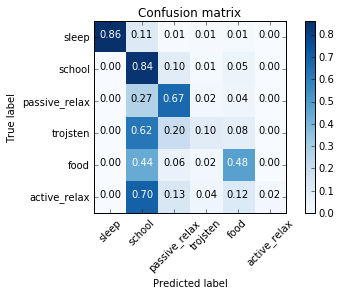

In [33]:
svc = svm.SVC(C=1, gamma=0.00005, kernel='rbf')
utils.evaluate_model(svc, X, y, splits)

svc.fit(X, y)
cm = confusion_matrix(y, svc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:113

Training accuracy: 0.547206118319 +/- 0.00299121817486
Testing accuracy: 0.541486099073 +/- 0.0148853775864

Training macro-F1: 0.354204034187 +/- 0.0113080918136
Testing macro-F1: 0.347959282819 +/- 0.0174536760441
Normalized confusion matrix


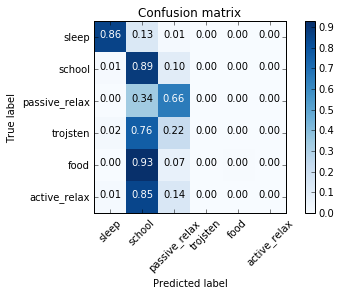

In [36]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=4)
utils.evaluate_model(rfc, X, y, splits)

rfc.fit(X, y)
cm = confusion_matrix(y, rfc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.613802221323 +/- 0.00506903619863
Testing accuracy: 0.583686134631 +/- 0.0141276890612

Training macro-F1: 0.500759755327 +/- 0.00616345965657
Testing macro-F1: 0.451824150591 +/- 0.0147326783067
Normalized confusion matrix


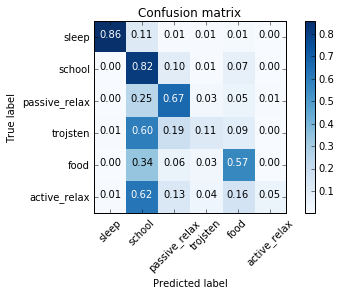

In [38]:
abc = AdaBoostClassifier(base_estimator=rfc, n_estimators=5)
utils.evaluate_model(abc, X, y, splits)

abc.fit(X, y)
cm = confusion_matrix(y, abc.predict(X))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Sleep can be easily separated, of all other events, most of all events are from category `school`, so the learning prefers models with high bias towards `school`.

# Part 3: Subsampled data

In [40]:
freq_dict = dict(utils.count_freqs(y))
survival_probs = np.array([400 / freq_dict[cat] for cat in y])
selected = np.random.rand(len(y)) < survival_probs

Xs = X[selected, :]
ys = y[selected]
print(Xs.shape)
print(ys.shape)
print(utils.count_freqs(ys))

(2357, 4)
(2357,)
[(0, 402), (1, 414), (2, 407), (3, 398), (4, 393), (5, 343)]


In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
splits = list(kf.split(Xs))

Training accuracy: 0.579126271761 +/- 0.00281667782001
Testing accuracy: 0.508274856958 +/- 0.0179730760977

Training macro-F1: 0.566988902564 +/- 0.00378259779682
Testing macro-F1: 0.491744076196 +/- 0.0181978807266
Normalized confusion matrix


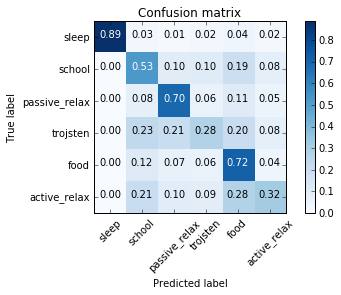

In [42]:
svc = svm.SVC(C=1, gamma=0.00005, kernel='rbf')
utils.evaluate_model(svc, Xs, ys, splits)

svc.fit(Xs, ys)
cm = confusion_matrix(ys, svc.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training accuracy: 0.509439932942 +/- 0.00268656441209
Testing accuracy: 0.503606642916 +/- 0.0124903745875

Training macro-F1: 0.441144193838 +/- 0.0125073100252
Testing macro-F1: 0.434379223318 +/- 0.0146074059849
Normalized confusion matrix


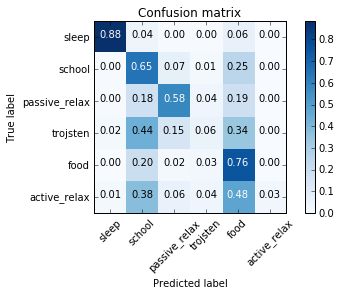

In [43]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=4)
utils.evaluate_model(rfc, Xs, ys, splits)

rfc.fit(Xs, ys)
cm = confusion_matrix(ys, rfc.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()

Training accuracy: 0.572655698417 +/- 0.00422848804195
Testing accuracy: 0.511240958653 +/- 0.0124750637757

Training macro-F1: 0.559478413133 +/- 0.00743744807874
Testing macro-F1: 0.492435853988 +/- 0.0143259518614
Normalized confusion matrix


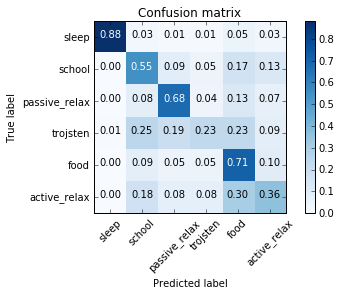

In [46]:
abc = AdaBoostClassifier(base_estimator=rfc, n_estimators=3)
utils.evaluate_model(abc, Xs, ys, splits)

abc.fit(Xs, ys)
cm = confusion_matrix(ys, abc.predict(Xs))
utils.plot_confusion_matrix(cm, categories, normalize=True)
plt.show()